In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [50]:
df = pd.read_csv("Customer_Churn.csv")
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [51]:
df.drop('customerID',axis='columns',inplace=True)

In [52]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [53]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [54]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [55]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [56]:
df.shape

(7043, 20)

In [57]:
df.iloc[488].TotalCharges

' '

In [58]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [59]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [60]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [61]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\mohan\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [62]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [63]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


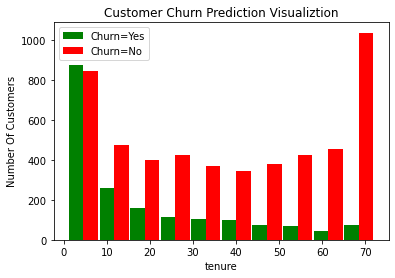

In [64]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

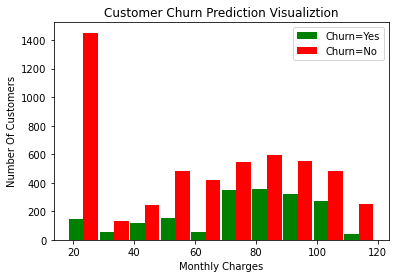

In [65]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [66]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [67]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [68]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\mohan\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [69]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [70]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\mohan\anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [71]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [72]:
df1.gender.unique()

array(['Female', 'Male'], dtype=object)

In [73]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [74]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [75]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
758,1,0,0,1,15,1,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
6807,0,0,1,1,6,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
1498,0,1,0,0,15,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
1191,0,0,1,1,35,1,1,1,1,1,...,1,0,0,0,0,1,0,1,0,0
1854,0,1,0,0,1,0,0,0,1,1,...,1,0,0,1,0,0,0,0,1,0


In [76]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [77]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [78]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [79]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [80]:
X_train.shape

(5625, 26)

In [81]:
X_test.shape

(1407, 26)

In [82]:
X_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [83]:
len(X_train.columns)

26

In [84]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [85]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [86]:
 y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.7079
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.7931
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.7982
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8016
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8048
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8071
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4069 - accuracy: 0.8053
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4038 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3527 - accuracy: 0.8354
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8375
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3507 - accuracy: 0.8356
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3502 - accuracy: 0.8370
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3501 - accuracy: 0.8341
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3508 - accuracy: 0.8366
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3497 - accuracy: 0.8361
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3490 - accuracy: 0.8354
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3492 - accuracy: 0.8354
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3475 - accuracy: 

# Mitigating Skewdness of Data
# Method 1: Undersampling

In [87]:
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [88]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [89]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [90]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [91]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.6518
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5202 - accuracy: 0.7552
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4970 - accuracy: 0.7592
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4897 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7689
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4819 - accuracy: 0.7672
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4777 - accuracy: 0.7726
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7742
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4740 - accuracy: 0.7749
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7759
Epoch 11/

94/94 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.8144
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8174
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8167
Epoch 86/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3981 - accuracy: 0.8154
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3943 - accuracy: 0.8214
Epoch 88/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 0.8201
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8187
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8191
Epoch 91/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3937 - accuracy: 0.8177
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.8181
Epoch 93/100


# Method2: Oversampling

In [92]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [93]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [94]:
# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [95]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5528 - accuracy: 0.7275
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4935 - accuracy: 0.7614
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4861 - accuracy: 0.7663
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.7696
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7723
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.7746
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4708 - accuracy: 0.7738
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4682 - accuracy: 0.7768
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4650 - accuracy: 0.7786
Epoch 10/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4637 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3785 - accuracy: 0.8310
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3773 - accuracy: 0.8322
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3786 - accuracy: 0.8311
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8339
Epoch 85/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8346
Epoch 86/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3767 - accuracy: 0.8328
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3732 - accuracy: 0.8338
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8334
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3744 - accuracy: 0.8339
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3737 - accuracy: 

# Method3: SMOTE

In [96]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [97]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [99]:
# Number of classes in training Data
y_train.value_counts()

0    4130
1    4130
Name: Churn, dtype: int64

In [100]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 1s 1ms/step - loss: 0.5450 - accuracy: 0.7332
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.7755
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.7823
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4521 - accuracy: 0.7889
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7937
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4431 - accuracy: 0.7944
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.7994
Epoch 8/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7988
Epoch 9/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.7996
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4252 - accura

259/259 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8479
Epoch 82/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8523
Epoch 83/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8547
Epoch 84/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3339 - accuracy: 0.8535
Epoch 85/100
259/259 [==============================] - 0s 974us/step - loss: 0.3320 - accuracy: 0.8550
Epoch 86/100
259/259 [==============================] - 0s 993us/step - loss: 0.3332 - accuracy: 0.8542
Epoch 87/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3365 - accuracy: 0.8500
Epoch 88/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8521
Epoch 89/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8562
Epoch 90/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3321 - accura

# Method4: Use of Ensemble with undersampling

In [101]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [102]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [103]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [104]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [105]:
df3 = X_train.copy()
df3['Churn'] = y_train
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [106]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [107]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train 

In [108]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6493 - accuracy: 0.6441
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5264 - accuracy: 0.7515
Epoch 3/100
94/94 [==============================] - 0s 999us/step - loss: 0.4970 - accuracy: 0.7629
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4912 - accuracy: 0.7666
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4873 - accuracy: 0.7676
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4865 - accuracy: 0.7656
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4831 - accuracy: 0.7712
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7635
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7696
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.7659
Epoch 1

94/94 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8154
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8090
Epoch 84/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4135 - accuracy: 0.8090
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4092 - accuracy: 0.8134
Epoch 86/100
94/94 [==============================] - 0s 964us/step - loss: 0.4089 - accuracy: 0.8181
Epoch 87/100
94/94 [==============================] - 0s 988us/step - loss: 0.4095 - accuracy: 0.8191
Epoch 88/100
94/94 [==============================] - 0s 988us/step - loss: 0.4083 - accuracy: 0.8164
Epoch 89/100
94/94 [==============================] - 0s 971us/step - loss: 0.4095 - accuracy: 0.8107
Epoch 90/100
94/94 [==============================] - 0s 977us/step - loss: 0.4063 - accuracy: 0.8154
Epoch 91/100
94/94 [==============================] - 0s 985us/step - loss: 0.4058 - accuracy: 0.8191
E

In [109]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6545 - accuracy: 0.6187
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5381 - accuracy: 0.7508
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5049 - accuracy: 0.7575
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7615
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.7682
Epoch 6/100
94/94 [==============================] - 0s 999us/step - loss: 0.4834 - accuracy: 0.7635
Epoch 7/100
94/94 [==============================] - 0s 992us/step - loss: 0.4803 - accuracy: 0.7662
Epoch 8/100
94/94 [==============================] - 0s 981us/step - loss: 0.4760 - accuracy: 0.7639
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4741 - accuracy: 0.7652
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7699
Epo

94/94 [==============================] - 0s 1ms/step - loss: 0.3979 - accuracy: 0.8127
Epoch 83/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3977 - accuracy: 0.8090
Epoch 84/100
94/94 [==============================] - 0s 982us/step - loss: 0.3965 - accuracy: 0.8077
Epoch 85/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3980 - accuracy: 0.8107
Epoch 86/100
94/94 [==============================] - 0s 984us/step - loss: 0.3962 - accuracy: 0.8117
Epoch 87/100
94/94 [==============================] - 0s 961us/step - loss: 0.3962 - accuracy: 0.8164
Epoch 88/100
94/94 [==============================] - 0s 952us/step - loss: 0.3963 - accuracy: 0.8164
Epoch 89/100
94/94 [==============================] - 0s 965us/step - loss: 0.3959 - accuracy: 0.8164
Epoch 90/100
94/94 [==============================] - 0s 977us/step - loss: 0.3933 - accuracy: 0.8127
Epoch 91/100
94/94 [==============================] - 0s 961us/step - loss: 0.3917 - accuracy: 0.8137

In [110]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
83/83 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.6770
Epoch 2/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5301 - accuracy: 0.7548
Epoch 3/100
83/83 [==============================] - 0s 1ms/step - loss: 0.5018 - accuracy: 0.7658
Epoch 4/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4896 - accuracy: 0.7670
Epoch 5/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.7708
Epoch 6/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4771 - accuracy: 0.7674
Epoch 7/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4730 - accuracy: 0.7791
Epoch 8/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4692 - accuracy: 0.7814
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4677 - accuracy: 0.7818
Epoch 10/100
83/83 [==============================] - 0s 1ms/step - loss: 0.4652 - accuracy: 0.7822
Epoch 11/

83/83 [==============================] - 0s 1ms/step - loss: 0.3842 - accuracy: 0.8231
Epoch 83/100
83/83 [==============================] - 0s 996us/step - loss: 0.3807 - accuracy: 0.8231
Epoch 84/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3824 - accuracy: 0.8262
Epoch 85/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8247
Epoch 86/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3789 - accuracy: 0.8258
Epoch 87/100
83/83 [==============================] - 0s 995us/step - loss: 0.3793 - accuracy: 0.8273
Epoch 88/100
83/83 [==============================] - 0s 978us/step - loss: 0.3775 - accuracy: 0.8262
Epoch 89/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8205
Epoch 90/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8254
Epoch 91/100
83/83 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8266
Epoch 9

In [111]:
len(y_pred1)

1407

In [112]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [113]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1033
           1       0.48      0.78      0.59       374

    accuracy                           0.71      1407
   macro avg       0.69      0.74      0.69      1407
weighted avg       0.79      0.71      0.73      1407

